# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [2]:
df_spotify_0 = pd.read_csv("spotify_data/streaminghistory0.csv")

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [3]:
print(help(pd.DataFrame.head))
print(help(pd.DataFrame.tail))

Help on function head in module pandas.core.generic:

head(self, n: 'int' = 5) -> 'Self'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [4]:
df_spotify_0.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05,Lorde,Team,8984.0
4,2022-12-06 21:05,Ariana Grande,Into You,1221.0


In [5]:
df_spotify_0.tail(10)

,endTime,artistName,trackName,msPlayed
11949,2023-01-02 20:58,Ariana Grande,six thirty,1699.0
11950,2023-01-02 20:58,Leonard Cohen,Thanks for the Dance,19483.0
11951,2023-01-02 20:59,Des Rocs,Used to the Darkness,185.0
11952,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,603.0
11953,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,208.0
11954,2023-01-02 20:59,Kaizers Orchestra,Resistansen,208.0
11955,2023-01-02 20:59,Mr.Kitty,After Dark,101447.0
11956,2023-01-02 20:59,daddy's girl,after dark x sweater weather,301.0
11957,2023-01-02 20:59,daddy's girl,after dark x sweater weather,208.0
11958,2023-01-02 20:59,daddy's girl,after dark x sweater weather,789.0


#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [6]:
# Useful to convert the column "endTime" from object type to datetime type
print(df_spotify_0.dtypes)
df_spotify_0["endTime"] = pd.to_datetime(df_spotify_0["endTime"])
print(df_spotify_0.dtypes)

endTime        object
artistName     object
trackName      object
msPlayed      float64
dtype: object
endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed             float64
dtype: object


#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [7]:
print(len(df_spotify_0["artistName"].unique()))

495


#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [8]:
print(len(df_spotify_0["trackName"].unique()))

1308


### Part 1: Questions
Q1: Which columns are in the dataset?

The columns in the dataset are "endTime", "artistName", "trackName" and "msplayed".


Q2: What timeframe does the dataset span?

The dataset spans from 2022-12-03 until 2023-01-02 according to the endTime column shown in the head and tail of the dataset.


Q3: How many unique artists are in the dataset?

The amount of unique artists played are 495.


Q4: How many unique songs are in the dataset?

The amount of unique songs played are 1308 songs.

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [9]:
import glob

csv_files = sorted(glob.glob("spotify_data/streaminghistory*.csv"))

dfs = {f"df_spotify_{i}": pd.read_csv(file) for i, file in enumerate(csv_files)}

df = pd.concat(dfs.values(), ignore_index=True)

#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [10]:
df['endTime'] = pd.to_datetime(df['endTime'])
df = df.sort_values(by="endTime")  

df

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0
...,...,...,...,...
71759,2023-12-07 21:13:00,Lana Del Rey,Ride,1126.0
71764,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0
71765,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0
71766,2023-12-07 21:17:00,The Vaccines,Your Love Is My Favourite Band,14661.0


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [11]:
drop = df[df['endTime'].dt.year != 2023].index
df = df.drop(drop)

df.head()


,endTime,artistName,trackName,msPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,139.0
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,487.0
10883,2023-01-01 01:17:00,Ariana Grande,positions,417.0
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",278.0


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [12]:
clean_df = df.dropna()
clean_df

,endTime,artistName,trackName,msPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,139.0
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,487.0
10883,2023-01-01 01:17:00,Ariana Grande,positions,417.0
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",278.0
...,...,...,...,...
71754,2023-12-07 21:13:00,Lana Del Rey,Young And Beautiful,3146.0
71759,2023-12-07 21:13:00,Lana Del Rey,Ride,1126.0
71764,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0
71765,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [13]:
clean_df.loc[:, "secPlayed"] = clean_df["msPlayed"] / 1000
clean_df = clean_df.drop(columns="msPlayed")
clean_df

C:\Users\hopee\AppData\Local\Temp\ipykernel_13816\1676654459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, "secPlayed"] = clean_df["msPlayed"] / 1000


,endTime,artistName,trackName,secPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.278
...,...,...,...,...
71754,2023-12-07 21:13:00,Lana Del Rey,Young And Beautiful,3.146
71759,2023-12-07 21:13:00,Lana Del Rey,Ride,1.126
71764,2023-12-07 21:14:00,Ariana Grande,my hair,23.757
71765,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9.317


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

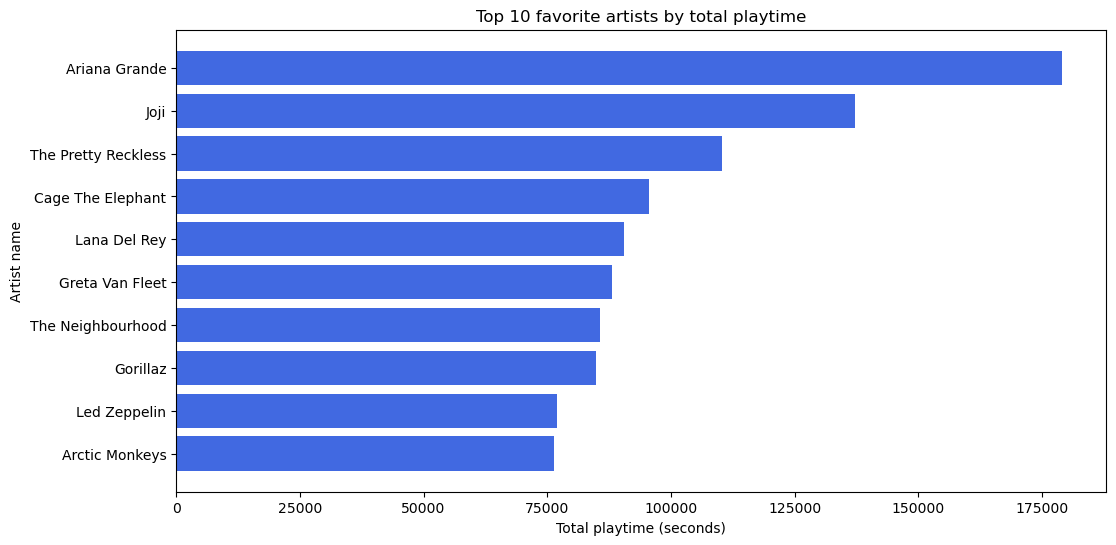

In [14]:
artists_df = clean_df[["artistName", "secPlayed"]].copy()
artists_df = artists_df.groupby(["artistName"]).sum()
artists_df = artists_df.sort_values("secPlayed", ascending=False)
artists_df.head(10)
top_10_artists = artists_df.head(10).reset_index()

plt.figure(figsize=(12, 6))
plt.barh(top_10_artists["artistName"], top_10_artists["secPlayed"], color="royalblue")
plt.xlabel("Total playtime (seconds)")
plt.ylabel("Artist name")
plt.title("Top 10 favorite artists by total playtime")
plt.gca().invert_yaxis()
plt.show()

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

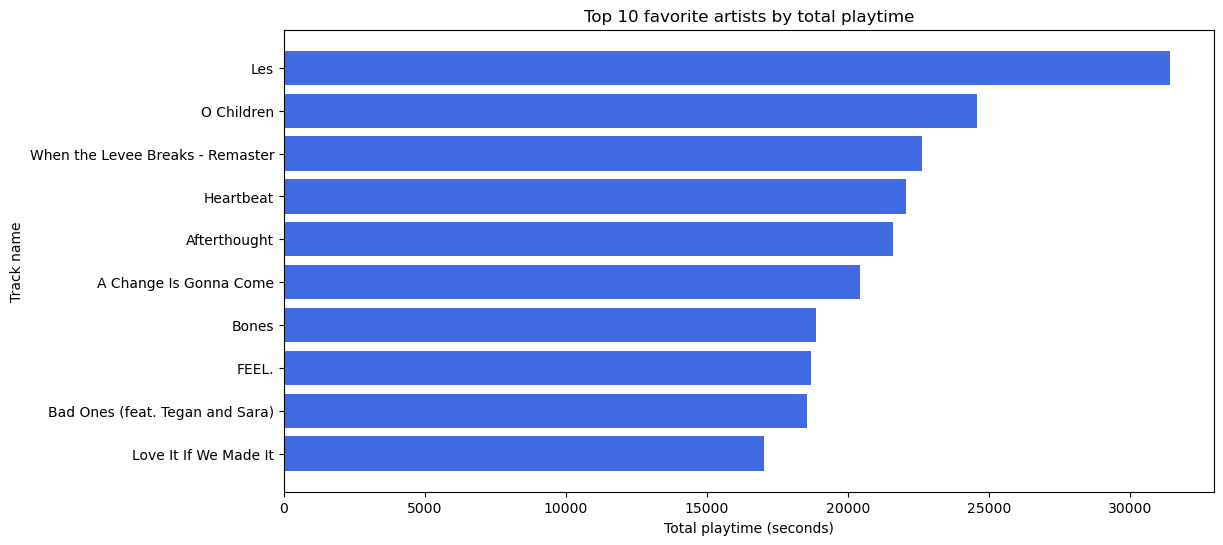

In [15]:
songs_df = clean_df[["trackName", "secPlayed"]].copy()
songs_df = songs_df.groupby(["trackName"]).sum()
songs_df = songs_df.sort_values("secPlayed", ascending=False)
songs_df.head(10)
top_10_songs = songs_df.head(10).reset_index()


plt.figure(figsize=(12, 6))
plt.barh(top_10_songs["trackName"], top_10_songs["secPlayed"], color="royalblue")
plt.xlabel("Total playtime (seconds)")
plt.ylabel("Track name")
plt.title("Top 10 favorite artists by total playtime")
plt.gca().invert_yaxis()
plt.show()

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

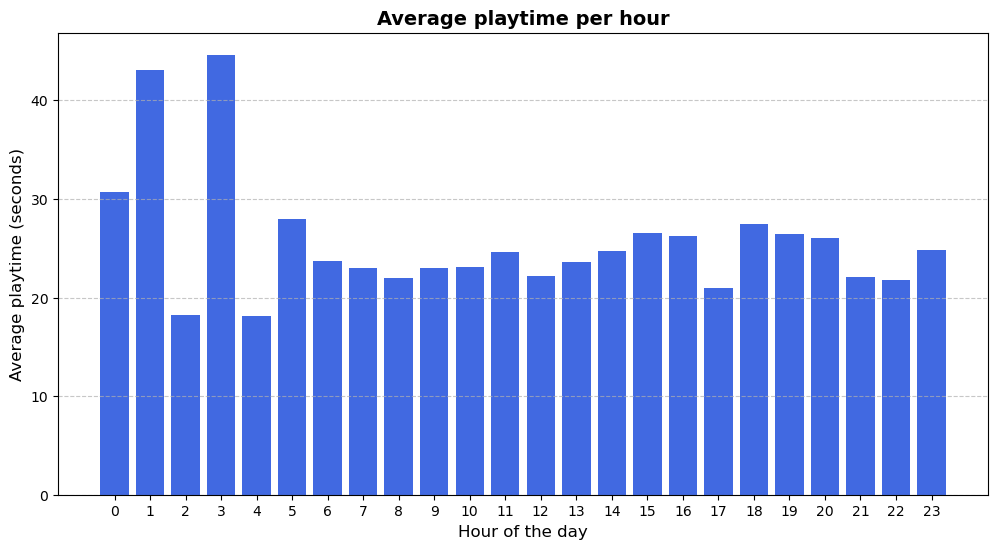

In [16]:
avg_time = clean_df[["endTime", "secPlayed"]].copy()
avg_time["hour"] = avg_time["endTime"].dt.hour  # Extract hour (0-23)

avg_time = avg_time.groupby("hour")["secPlayed"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_time["hour"], avg_time["secPlayed"], color="royalblue")
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Average playtime (seconds)", fontsize=12)
plt.title("Average playtime per hour", fontsize=14, fontweight="bold")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

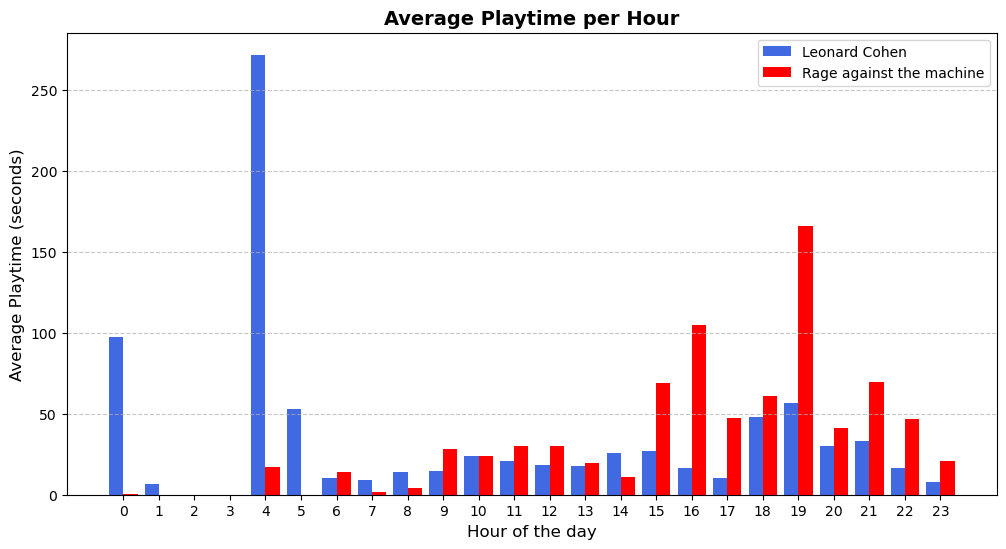

In [17]:
music_type_df = clean_df[["endTime", "artistName", "secPlayed"]].copy()
music_type_df = music_type_df[music_type_df["artistName"].isin(["Leonard Cohen", "Rage Against The Machine"])]
music_type_df["hour"] = music_type_df["endTime"].dt.hour
music_type_df = music_type_df.groupby(["artistName", "hour"])["secPlayed"].mean().reset_index()

leonard_cohen_data = music_type_df[music_type_df["artistName"] == "Leonard Cohen"]
R_a_t_M_data = music_type_df[music_type_df["artistName"] == "Rage Against The Machine"]

plt.figure(figsize=(12, 6))
plt.bar(leonard_cohen_data["hour"] - 0.2, leonard_cohen_data["secPlayed"], 0.4, color="royalblue", label="Leonard Cohen")
plt.bar(R_a_t_M_data["hour"]+ 0.2, R_a_t_M_data["secPlayed"], 0.4, color="red", label="Rage against the machine")

plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Average Playtime (seconds)", fontsize=12)
plt.title("Average Playtime per Hour", fontsize=14, fontweight="bold")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [18]:
clean_df["skipped"] = (clean_df["secPlayed"] <= 30).astype(int)
clean_df.head(15)

,endTime,artistName,trackName,secPlayed,skipped
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139,1
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487,1
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417,1
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205,1
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.278,1
10886,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.325,1
10887,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12.293,1
10888,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22.929,1
10893,2023-01-01 01:19:00,Regina Spektor,Us - 2005 Remaster,16.670,1
10892,2023-01-01 01:19:00,Lorde,Solar Power,0.464,1


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

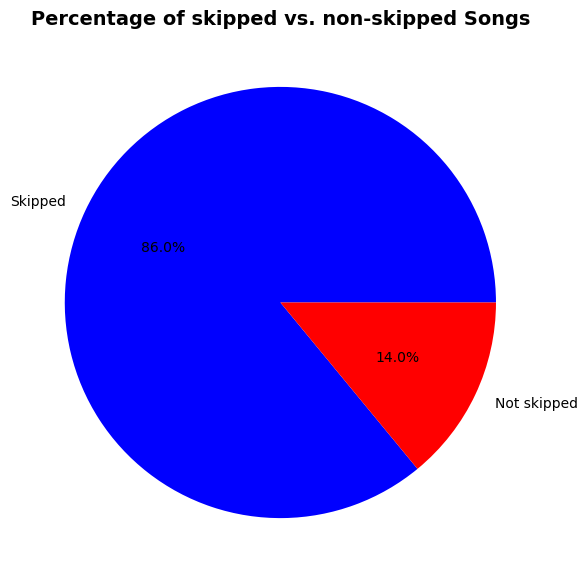

In [19]:
plt.figure(figsize=(7, 7))
plt.pie(clean_df["skipped"].value_counts(), labels=["Skipped", "Not skipped"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Percentage of skipped vs. non-skipped Songs", fontsize=14, fontweight="bold")
plt.show()

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [20]:

df_skipped = ((clean_df[clean_df["skipped"] == 1].groupby("artistName")["skipped"].count() / 
              clean_df.groupby("artistName")["skipped"].count()) * 100).round(2)

df_skipped = df_skipped.reset_index().rename(columns={"skipped": "SkipRate"})

df_skipped.head(10)

,artistName,SkipRate
0,10cc,67.86
1,2Pac,86.16
2,3 Doors Down,50.00
3,4 Non Blondes,72.13
4,50 Cent,67.86
5,88rising,70.04
6,A Day To Remember,68.42
7,A Problem Squared,100.00
8,A R I Z O N A,80.00
9,A Tribe Called Quest,79.23


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [21]:
top_3 = df_skipped.nlargest(3, "SkipRate") 
bottom_3 = df_skipped.nsmallest(3, "SkipRate")

""" print(top_3.to_string(index=False)) 

print(bottom_3.to_string(index=False)) """

print("Highest skip rate:\n", top_3, "\n")
print("Lowest skip rate:\n", bottom_3)



Highest skip rate:
            artistName  SkipRate
7   A Problem Squared     100.0
16         Acid Ghost     100.0
25  Albert Hammond Jr     100.0 

Lowest skip rate:
     artistName  SkipRate
645   Roc Boyz     11.11
437      LACES     14.29
878      Wham!     16.67


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [22]:
df_ariana = clean_df[clean_df["artistName"] == "Ariana Grande"]
df_ariana

,endTime,artistName,trackName,secPlayed,skipped
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139,1
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487,1
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417,1
10887,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12.293,1
10888,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22.929,1
...,...,...,...,...,...
71743,2023-12-07 17:46:00,Ariana Grande,Almost Is Never Enough,28.483,1
71750,2023-12-07 20:51:00,Ariana Grande,needy,26.220,1
71756,2023-12-07 21:13:00,Ariana Grande,pete davidson,0.603,1
71763,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13.448,1


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

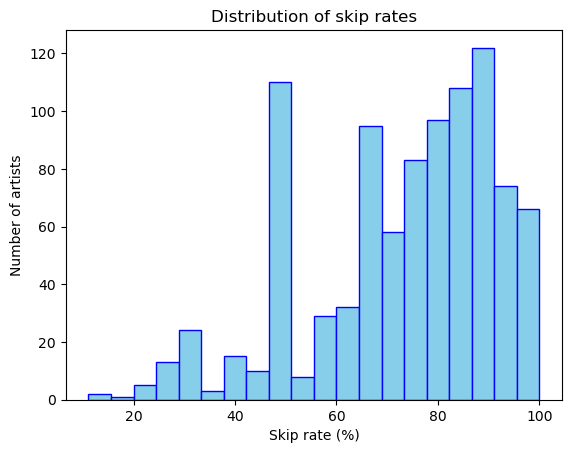

Skiprate Ariana: 99.53%, average skiprate: 73.13%


In [ ]:
plt.hist(df_skipped["SkipRate"], bins=20, color="skyblue", edgecolor="blue")

plt.xlabel("Skip rate (%)")
plt.ylabel("Number of artists")
plt.title("Distribution of skip rates")

plt.show()


skiprate_ariana = (df_skipped[df_skipped["artistName"] == "Ariana Grande"]["SkipRate"]).values[0]
average_skiprate = df_skipped["SkipRate"].mean().__round__(2)


print(f"Skiprate Ariana: {skiprate_ariana}%, average skiprate: {average_skiprate}%")

### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?